# Trabalho avaliativo

Sistemas de controle II - 2022.4

Espaço de estados 

**Entrega: 26/12/2022**

Aluno:

Matrícula:



## 1.
Execute o código abaixo:

In [1]:
import numpy as np
a = np.random.randint(1,20)/1.
b = np.random.randint(1,20)/1.
c = np.random.randint(1,9)/1.
a = 11.
b = 17.
c = 7.
print('a = ', a)
print('b = ', b)
print('c = ', c)

a =  11.0
b =  17.0
c =  7.0


No problema abaixo, use os valores de "a" e "b" resultantes do código anterior.


*Dado o sistema*
$$
\begin{align}
    G(s) &= \frac{as+b}{(s+c)^2}
\end{align}
$$

Em malha fechada, deseja-se para esse sistema um máximo sobressinal de 12% e uma frequência natural de $2c$ rad/s. Também é desejável que o zero do sistema seja cancelado.

1. *Encontre as raizes e o polinômio de malha fechado que proporcionem as especificações do projeto*
2. *Encontre as matrizes do sistema na forma canônica de controlador. Projete um regulador de estados com controle integral que posicione os pólos de malha fechada de acordo com as especificações de projeto*
3. *Projete um observador de estados para este sistema.*
4. *Encontre as funções de transferência do sistema de controle. Apresente um diagrama de blocos mostrando a ação dessas funções*. 
4. *Simule o sistema em malha fechada. Plote e analise o sinal de saída e o sinal de controle.*

*Suas respostas e códigos a partir daqui*

## 1. Especificações de projeto
$$
\begin{align}
    \xi &= \frac{-\log(M_p)}{\sqrt{\pi^2+\log(M_p)^2}}\\
    \omega_n &= 2c\\
    p &= \xi\omega_n\pm j\omega_n\sqrt{1-\xi^2}\\
    \alpha(s) &= (s^2+2\xi\omega_n s + \omega_n^2)(s+b/a)
\end{align}
$$

In [2]:
#
import control as ct
from IPython.display import display, Math
from matplotlib import pyplot as plt


In [3]:
# Parâmetros de projeto
Mp = 0.12
xi = -np.log(Mp)/np.sqrt(np.pi**2+np.log(Mp)**2)
wn = 2.*c
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
polos = [p, np.conj(p), -b/a]
poli = np.convolve([1,2*xi*wn,wn**2],[1,b/a])

print('Overshoot e amortecimento:')
display(Math(r'M_p = 0.12,\quad \xi = ' + '{:.4}'.format(xi)))
print('Frequência natural (rad/s)')
display(Math(r'\omega_n = ' + '{:.4}'.format(wn)))
print('Pólos desejados: ')
display(Math('{:.4},{:.4},{:.4}'.format(*polos)))
str_poli = 's^3' + '{:+.4}s^2'.format(poli[1]) + '{:+.4}s'.format(poli[2]) + '{:+.4}'.format(poli[3])
print("Polinômio desejado")
display(Math(r'\alpha(s) = ' + str_poli))

Overshoot e amortecimento:


<IPython.core.display.Math object>

Frequência natural (rad/s)


<IPython.core.display.Math object>

Pólos desejados: 


<IPython.core.display.Math object>

Polinômio desejado


<IPython.core.display.Math object>

## 2. Regulador integral

In [4]:
# Função de transferência em malha aberta
n = f'{a}'+ 's+' +f'{b}'
d = '(s+' + f'{c}' + ')^2'
str = r'G(s) = \frac{' + n + '}{' + d + '}'
display(Math(str))

<IPython.core.display.Math object>

In [5]:
# Equações em FCC
F = np.array([[-2*c,-(c**2)],[1.,0.]])
G = np.array([[1.],[0.]])
H = np.array([[a,b]])

In [6]:
# Sistema em FCC

# A função abaixo é útil para converter matrizes em código latex para escrita matemática
def dispmat(A):
    cols = ''.join(['r']*A.shape[1])
    str = r'\left[\begin{array}{' + cols + r'}'
    (m,n) = A.shape
    for i in range(m):
      for j in range(n):
        if j<n-1:
          str = str + '{:.3}'.format(A[i][j]) + '&'
        else:
          str = str + '{:.3}'.format(A[i][j]) + r'\\'
    return str + r'\end{array}\right]'

str = r'\dot{\mathbf{x}} = ' + dispmat(F) + r'\mathbf{x}'
str = str + '+' + dispmat(G) + 'u'
display(Math(str))
str = r'y = ' + dispmat(H) + r'\mathbf{x}'
display(Math(str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Matrizes aumentadas com integrador:
Fa = np.block([ [  F,   np.zeros((2,1)) ],
                [ -H,   np.zeros((1,1)) ]])

Ga = np.block([[G], [np.zeros((1,1))]])

display(Math('F_a = ' + dispmat(Fa)))
display(Math('G_a = ' + dispmat(Ga)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Alocação de polos:
Ka = ct.acker(Fa,Ga,[p,np.conjugate(p),-b/a])
K = Ka[:,0:2]
Ki = np.array([Ka[:,-1]])
display(Math(r'\mathbf{K}_a = ' + dispmat(np.round(Ka,4))))
display(Math(r'\mathbf{K} = ' + dispmat(np.round(K,4))))
display(Math(r'K_i = {}'.format(np.round(Ki[0],4)) ))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 3. Observador

Polos do observador serão reais e iguais, a um fator de 5 da parte real dos pólos dominantes. Como o zero do sistema é pequeno, podemos fazer isso com segurança. 


In [9]:
# Define os pólos do observador
po = np.round(4*np.real(p),4)
print('Polos do observador: ')
display(Math(dispmat(np.array([[po,po]]))))

Polos do observador: 


<IPython.core.display.Math object>

In [10]:
# Alocação de polos do observador
L = ct.acker(F.T, H.T, [po,po]).T
display(Math(r'\mathbf{L} = ' + dispmat(np.round(L,4))))

<IPython.core.display.Math object>

## 4. Funções de transferência do controle

In [11]:
# Funções de transferência
Fc = np.block([[F-G@K-L@H, -G@Ki],[np.zeros((1,F.shape[1]+1))]])
Gc = np.block([[L, np.zeros((F.shape[0],1))],[np.array([-1,1])]])
Hc = -Ka
cont = ct.ss(Fc,Gc,Hc,0)
Cs = ct.tf(cont)

# Função para converter vetor de coeficientes em polinômio latex
def escpoli(a):
    n = a.size
    if n==1:
        str = 's'
    else:
        str = ''
    for i in range(n-1):
        if abs(a[i])>1e-8:
            if i==0:
                str = str + '{:.4}'.format(a[i]) + 's^{' + f'{n-1-i}' + '}'
            else:
                if n-1-i==1:
                    str = str + '{:+.4}'.format(a[i]) + 's'
                else:
                    str = str + '{:+.4}'.format(a[i]) + 's^{' + f'{n-1-i}' + '}'
    if abs(a[-1])>1e-8:
            str = str + '{:+.4}'.format(a[-1])
    return str

strC1 = r'C_1(s) = \frac{' +  escpoli(Cs.num[0][0]) +'}{' + escpoli(Cs.den[0][0]) + '}'
strC2 = r'C_2(s) = \frac{' +  escpoli(Cs.num[0][1]) +'}{' + escpoli(Cs.den[0][1]) + '}'

print('Função de transf. saída para controle:')
display(Math(strC1))
print('Função de transf. referência para controle:')
display(Math(strC2))




Função de transf. saída para controle:


<IPython.core.display.Math object>

Função de transf. referência para controle:


<IPython.core.display.Math object>

No caso das equações que utilizei, a primeira coluna da matriz $\mathbf{G}$ contém os coeficientes referentes a $y$ e a segunda coluna é referente a $r$. Então, a primeira função de transferência calculada recebe o sinal de saída e a segunda recebe o sinal de referência da malha.  

## 5. Simulação

In [12]:
# Matrizes do sistema em malha fechada
Fmf = np.block([[F,-G@K,-G*Ki],[L@H,F-G@K-L@H,-G*Ki],[-H,np.zeros((1,3))]])
Gmf = np.block([[np.zeros((4,1))],[1]])
Hmf_y = np.block([[H,np.zeros((1,3))]])
Hmf_u = np.block([[-Ka,np.zeros((1,2))]])
Hmf = np.block([[Hmf_y],[Hmf_u]])
y_mf = ct.ss(Fmf,Gmf,Hmf_y,0)
u_mf = ct.ss(Fmf,Gmf,Hmf_u,1)

str = r'\dot{\mathbf{x}} = ' + dispmat(Fmf) + r'\mathbf{x} +' + dispmat(Gmf) + 'r'
display(Math(str))
str = r'y = ' + dispmat(Hmf) + r'\mathbf{x}'
display(Math(str))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
# Pólos e zeros em malha fechada
print('Resumo dos polos de malha fechada:')
print('')
T = ct.damp(y_mf)
str = dispmat(np.round(np.array([ct.zeros(y_mf)]),3))
print('')
print('Zeros do sistema:')
display(Math(str))
print('Pólos desejados:')
display(Math(dispmat(np.array([polos]))))


Resumo dos polos de malha fechada:

_____Eigenvalue______ Damping___ Frequency_
    -31.33                     1      31.33
    -31.33                     1      31.33
    -7.832     +11.6j     0.5594         14
    -7.832     -11.6j     0.5594         14
    -1.545                     1      1.545

Zeros do sistema:


<IPython.core.display.Math object>

Pólos desejados:


<IPython.core.display.Math object>

Comentário: o regulador alocou os pólos conforme desejado. O terceiro pólo do regulador foi colocado sobre o zero, conforme solicitado, e resulta em cancelamento em malha fechado. Trata-se de um zero próximo do eixo imaginário; caso não fosse cancelado, a dominância poderia ser comprometida. 

O observador adicionou dois pólos mais distantes dos dominantes. Estes pólos acabaram também cancelados e sua influência na resposta é baixa. 

In [14]:
# Simulação

tsim = 3*(2*np.pi/wn)    # Tempo de simulação calculado em função da frequência natural
t,y = ct.step_response(y_mf,tsim)
tu,u = ct.step_response(u_mf,20*tsim)

Máximo sinal de saída:  1.1199


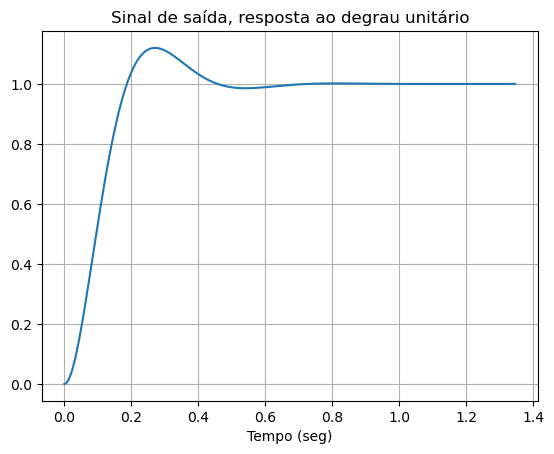

In [15]:
# Sinal de saída
plt.plot(t,y)
plt.grid()
plt.title('Sinal de saída, resposta ao degrau unitário')
plt.xlabel('Tempo (seg)')
print('Máximo sinal de saída: ',np.round(np.max(y),4))


Máximo sinal de controle:  2.5198


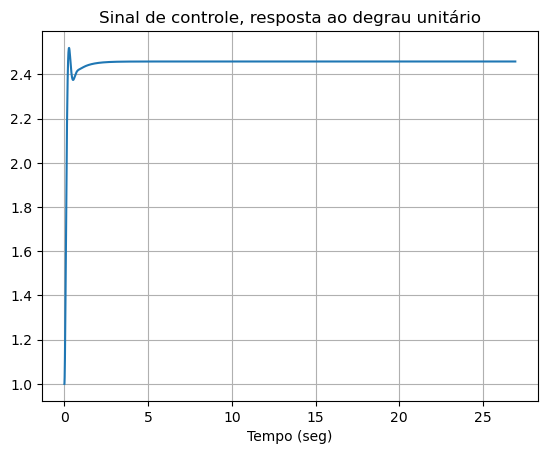

In [16]:
# Sinal de controle
plt.plot(tu,u)
plt.grid()
plt.title('Sinal de controle, resposta ao degrau unitário')
plt.xlabel('Tempo (seg)')
print('Máximo sinal de controle: ',np.round(np.max(u),4))

Comentário: Temos um sinal de controle sem transitório brusco. O valor máximo parece um pouco elevado e a trajetória é crescente no intervalo de tempo simulado. Isso provavelmente é um comportamento que vem do integrador, que normalmente produz uma resposta mais lenta. Neste caso, o ideal seria simular o sistema mais tempo e esperar o sinal de controle acomodar para nos certificarmos, mas é provável que ele estabilize em um valor razoável. 